In [1]:
import os
import pandas
import numpy as np
import torch
import matplotlib.pyplot as plt
import hcpdatautils as hcp
import isingutils as ising
import math
import time
import pickle

In [2]:
int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

In [3]:
data_dir = 'E:\\HCP_data'
model_dir = 'E:\\Ising_model_results_daai'
stats_dir = 'E:\\Ising_model_results_daai'

In [5]:
node_file_name = os.path.join(stats_dir, 'node_tree_training.pkl')
with open(node_file_name, 'rb') as node_file_ptr:
    node_tree = pickle.load(node_file_ptr)
    print(node_tree)

[[163, [92, [[111, [289, [[109, [171, [357, [[273, [302, [[113, [293, [177, [[114, [294, [[261, [168, [[351, [298, [[118, [126, [[119, [121, [[299, [314, [301, [[134, [112, [159, [[165, [238, [258, [[136, [190, [10, [[166, [106, [55, [[167, [135, [307, [[24, [308, [124, [[282, [58, [316, [[56, [346, [191, [352, [[102, [204, [105, [[152, [59, [236, [239, [[339, [285, [23, [203, [[347, [153, [235, [120, [98, [[281, [278, [104, [101, [138, [[272, [315, [222, [40, [284, [42, [[220, [221, [332, [300, [27, [[37, [318, [206, [207, [103, [26, [[333, [41, [139, [140, [319, [9, [320, [[189, [342, [162, [36, [216, [137, [321, [141, [[350, [46, [226, [48, [202, [228, [156, [22, [[181, [336, [1, [335, [317, [17, [21, [197, [155, [200, [201, [196, [16, [20, [47, [227, [6, [158, [157, [19, [199, [337, [186, [338, [331, [151, [18, [195, [198, [15, [2, [182, [5, [185, [192, [12, [184, [4, [183, [3, [0, 180]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]], [280, [283, [99, [279, [100, [233, [53, [35, [38, [218,

In [6]:
l2_file_name = os.path.join(stats_dir, 'node_l2_tree_training.pkl')
with open(l2_file_name, 'rb') as l2_file_ptr:
    l2_tree = pickle.load(l2_file_ptr)
    print(l2_tree)

[[1476812458, [[2400, []], [834302776, [[2400, []], [185026016, [[1809356172, [[2400, []], [1130193862, [[2400, []], [450343846, [[2086153516, [[2400, []], [1409489880, [[2400, []], [734679402, [[2400, []], [58763674, [[1748070558, [[2400, []], [1080390020, [[2400, []], [414598658, [[2089941284, [[2400, []], [1432846050, [[2400, []], [777993364, [[2400, []], [123639754, [[1842936078, [[2400, []], [1195062164, [[2400, []], [549007486, [[1674209598, [[2400, []], [1038363636, [[2400, []], [403632512, [[1616737004, [[2400, []], [991938186, [[2400, []], [369034106, [[1634789896, [[2400, []], [1023405148, [[2400, []], [413321612, [[1754967328, [[2400, []], [1154861040, [[2400, []], [556622470, [[1988971732, [[2400, []], [1401675210, [[2400, []], [816358848, [[2400, []], [233175926, [[1771557622, [[2400, []], [1199236502, [[2400, []], [628772240, [[2400, []], [56175192, [[2134948848, [[2400, []], [1634161722, [[2400, []], [1072209760, [[2400, []], [508412838, [[2093701720, [[2400, []], [15425

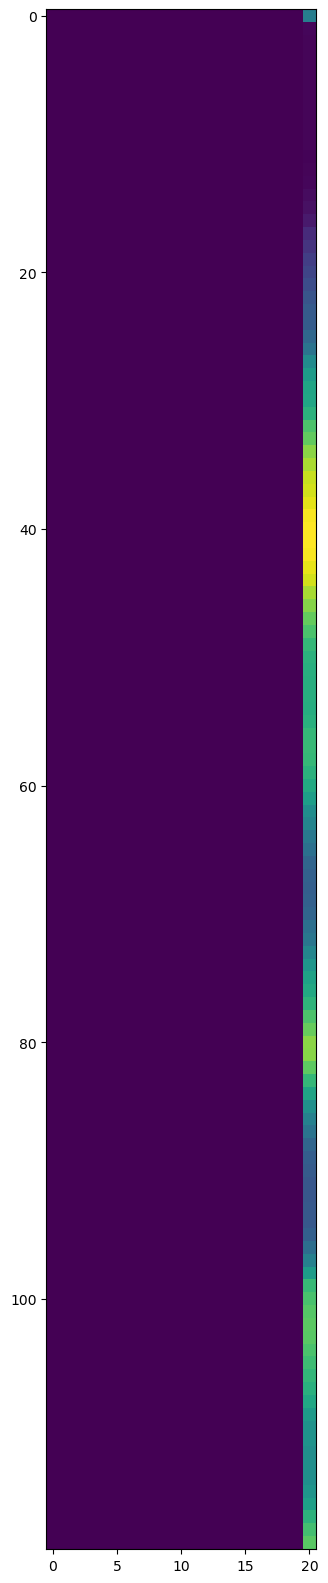

In [9]:
sum_ts_path = os.path.join(stats_dir, 'ts_binary_sums_training_nodes_21.pt')
sum_ts = torch.load(sum_ts_path)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 20))
axs.imshow( sum_ts[:120,:].detach().cpu().numpy() )

In [10]:
print( torch.count_nonzero(sum_ts), torch.numel(sum_ts) )

tensor(35315827, device='cuda:0') 67435200


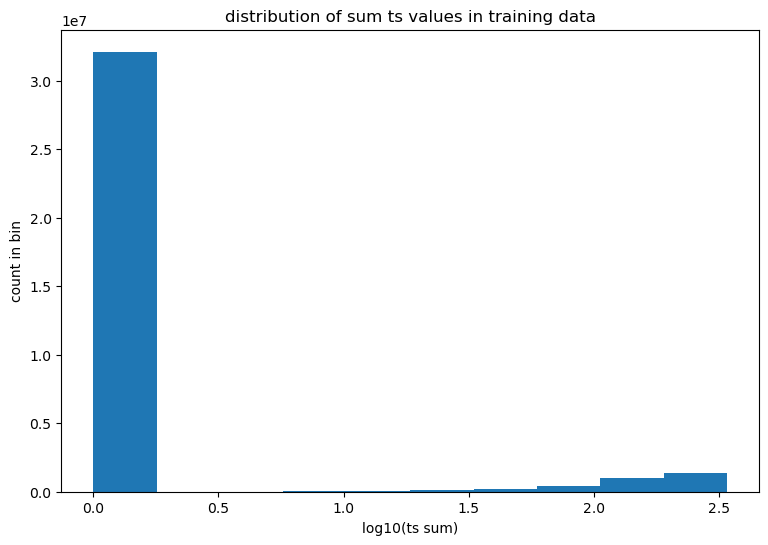

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.hist(  torch.log10(sum_ts[sum_ts > 0]).flatten().detach().cpu().numpy()  )
# axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
axs.set_xlabel('log10(ts sum)')
axs.set_ylabel('count in bin')
axs.set_title('distribution of sum ts values in training data')
plt.show()

In [24]:
print( torch.finfo().max )

3.4028234663852886e+38
